In [538]:
"""
We chose regression method algorithm to solve this case. 
Regression is a way to find the correlation between dependent and independent variables. 
Using input to correlate what a possible output can be. Regression is more preferable than classification when it comes to predicting numeric values. Classification would perhaps be a better method if the goal was to have the output defined in different classes. 
Regression will try to find the best line to predict an output more accurately. The easiest regression method for this case was a linear regression.
"""

'\nWe chose regression method algorithm to solve this case. \nRegression is a way to find the correlation between dependent and independent variables. \nUsing input to correlate what a possible output can be. Regression is more preferable than classification when it comes to predicting numeric values. Classification would perhaps be a better method if the goal was to have the output defined in different classes. \nRegression will try to find the best line to predict an output more accurately. The easiest regression method for this case was a linear regression.\n'

In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

data = pd.read_csv("C:/Users/kkara/Downloads/TSLA.csv")

In [540]:
data['Date'] = pd.to_datetime(data['Date'])
data.drop(columns="Volume", inplace=True)

In [541]:
data_corr = data.corr()

,Date,Open,High,Low,Close,Adj Close,Ordinal_date
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,733952
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,733953
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,733954
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,733955
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,733959


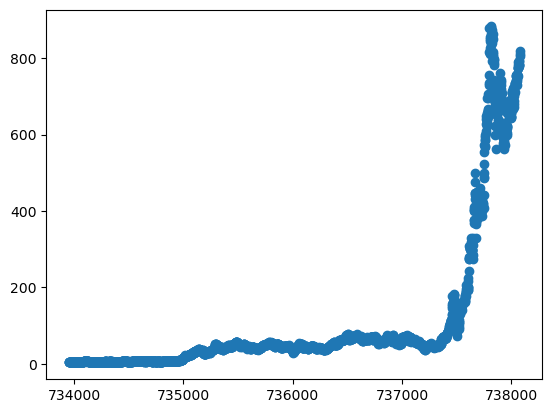

In [542]:
data['Date'] = pd.to_datetime(data['Date'])
data['Ordinal_date'] = data['Date'].map(dt.datetime.toordinal)

plt.scatter(data['Ordinal_date'], data['Close'])
data.head()

In [543]:
datetime_str = '01/01/20 00:00:00'
datetime_object = datetime.datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
data = data[data['Date'] >= datetime_object]


In [544]:
x = pd.DataFrame(data['Ordinal_date'])  
y = pd.DataFrame(data['Close'])

In [545]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [546]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [547]:
model = LinearRegression()
model.fit(x_train, y_train)

Y_pred = model.predict(x_train)

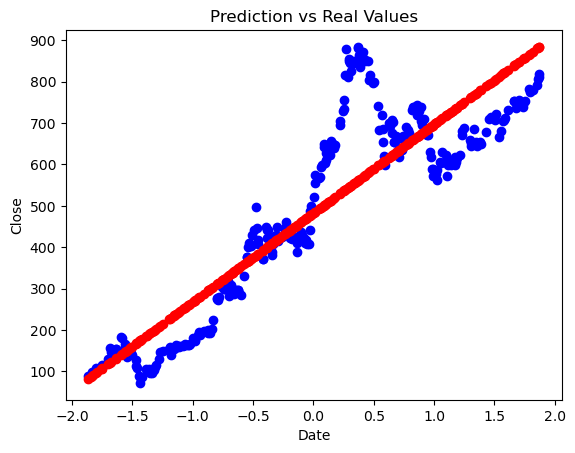

In [548]:
plt.scatter(x_train, y_train, color='blue', label='Real values')
plt.scatter(x_train, Y_pred, color='red', label='Predictions')

plt.xlabel('Date')

plt.ylabel('Close')
plt.title('Prediction vs Real Values')
plt.show()

In [549]:
def predict(date):
    converted_date = pd.to_datetime(date).toordinal()
    date_standardized = scaler.transform([[converted_date]])
    predicted_price = model.predict(date_standardized)
    print(f'Prediction for {date}: {predicted_price[0]}')

predicted_date = '2022-07-12'
end_prediction = predict(prediction_date)

Prediction for 2022-08-05: [1247.87556802]


In [550]:
Y_pred = model.predict(x_train)
mean_squared_error = metrics.mean_squared_error(y_train, Y_pred)
print('Mean Squared Error:', mean_squared_error)

mean_absolute_error = metrics.mean_absolute_error(y_train, Y_pred)
print('Mean Absolute Error:', mean_absolute_error)

Mean Squared Error: 12191.053200032466
Mean Absolute Error: 83.9293919887718
